In [7]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as tsm
import matplotlib.pyplot as plt
from typing import List

In [9]:
def basic_forecast(p: int, d: int, q: int, ar: List[float], ma: List[float], 
                   n: int, train_size: float):
    sim = pd.Series(tsm.arima_process.arma_generate_sample(ar=[1, *ar],
                                                           ma=[1, *ma],
                                                           nsample=n))
    if d:
        for _ in range(d):
            sim = np.cumsum(sim)
    
    train_sim = sim[:int(train_size * n)]
    test_sim = sim[int(train_size * n):]

    arima_fit = sm.tsa.arima.ARIMA(train_sim, order=(p, d, q),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False).fit()
    arima_predict = arima_fit.get_prediction(len(train_sim),
                                             len(train_sim) + len(test_sim) - 1)

    predicted = arima_predict.predicted_mean
    upper = predicted + arima_predict.se_mean
    lower = predicted - arima_predict.se_mean

    resid_frcst = test_sim - predicted
    lowess = sm.nonparametric.lowess(resid_frcst, resid_frcst.index)

    fig, ax = plt.subplots(nrows=2, figsize=(10, 8))

    ax[0].plot(test_sim, label="test")
    ax[0].plot(predicted, label="predicted")
    ax[0].plot(upper, linestyle="--", color="green", label="confidence interval")
    ax[0].plot(lower, linestyle="--", color="green")
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("values")
    ax[0].set_title(f"forecast for ARIMA({p}, {d}, {q})")
    ax[0].legend()

    ax[1].scatter(resid_frcst.index, resid_frcst)
    ax[1].plot(resid_frcst.index, lowess[:, 1], color="red")
    ax[1].axhline(0, color="black", linestyle="--", linewidth=1)
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel("residuals")
    ax[1].set_title(f"Residuals plot for forecast ARIMA({p}, {d}, {q})")

    fig.tight_layout()
    plt.show()

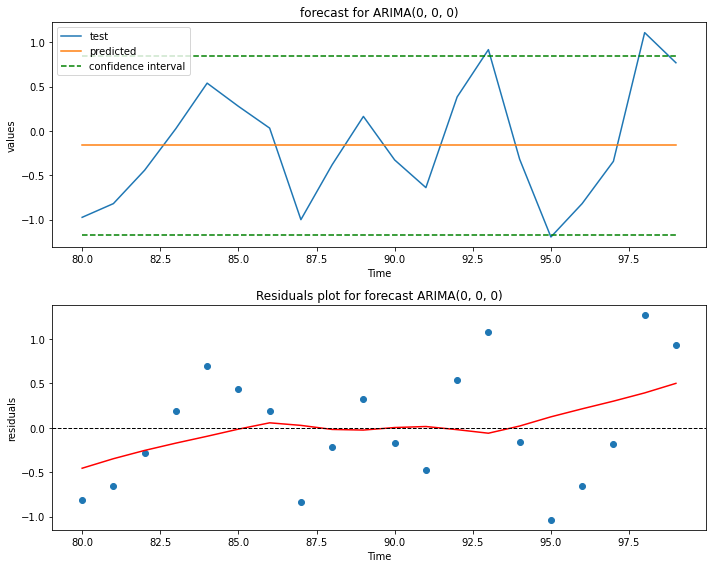

In [10]:
# White noise
basic_forecast(p=0, d=0, q=0, ar=[0], ma=[0], n=100, train_size=.8)

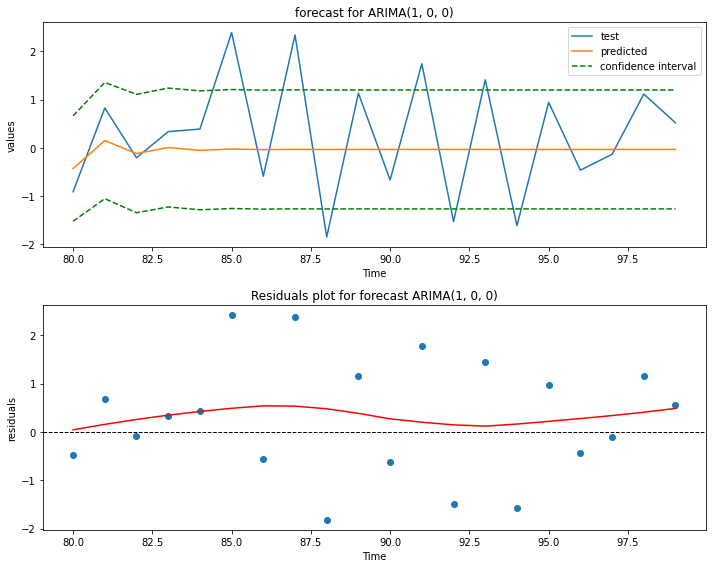

In [11]:
# AR(1)
basic_forecast(p=1, d=0, q=0, ar=[1/2], ma=[0], n=100, train_size=.8)

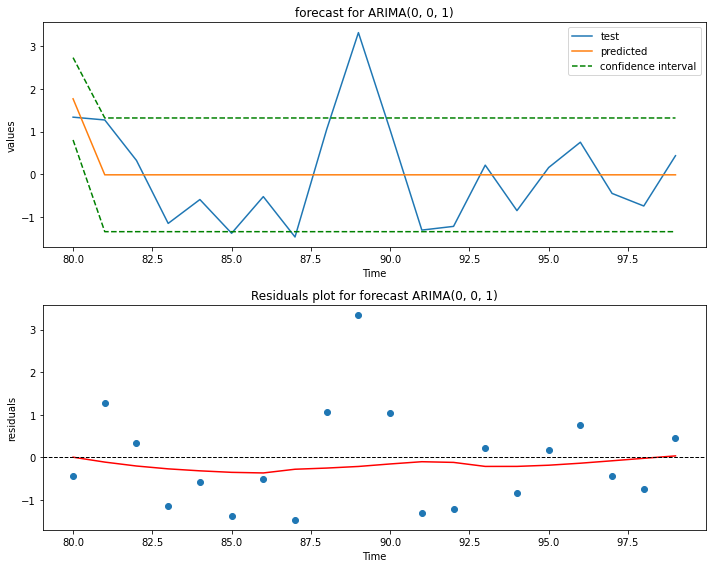

In [12]:
basic_forecast(p=0, d=0, q=1, ar=[0], ma=[1], n = 100, train_size=.8)

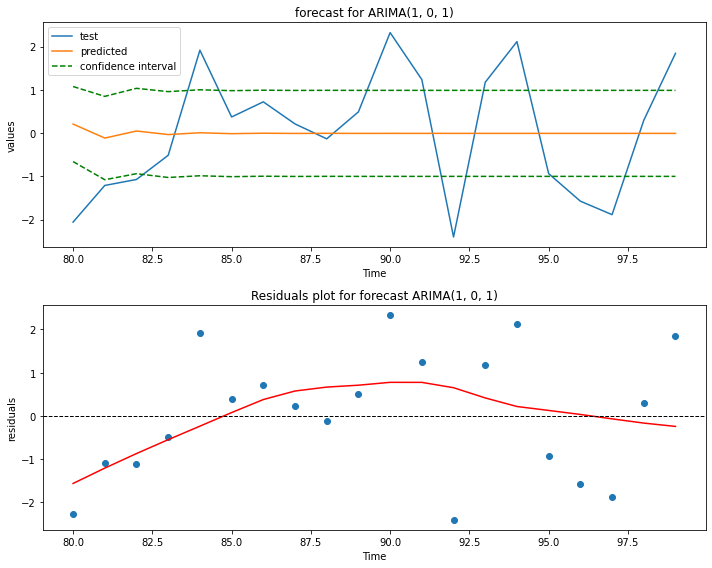

In [13]:
# ARMA(1, 1)
basic_forecast(p=1, d=0, q=1, ar=[1/2], ma=[1], n = 100, train_size=.8)

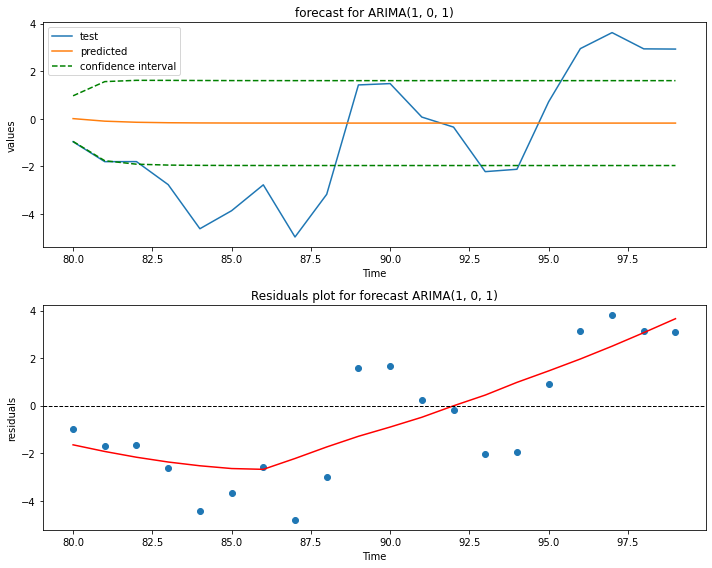

In [14]:
# ARIMA(1, 0, 1)
basic_forecast(p=1, d=0, q=1, ar=[-1/2], ma=[1], n = 100, train_size=.8)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


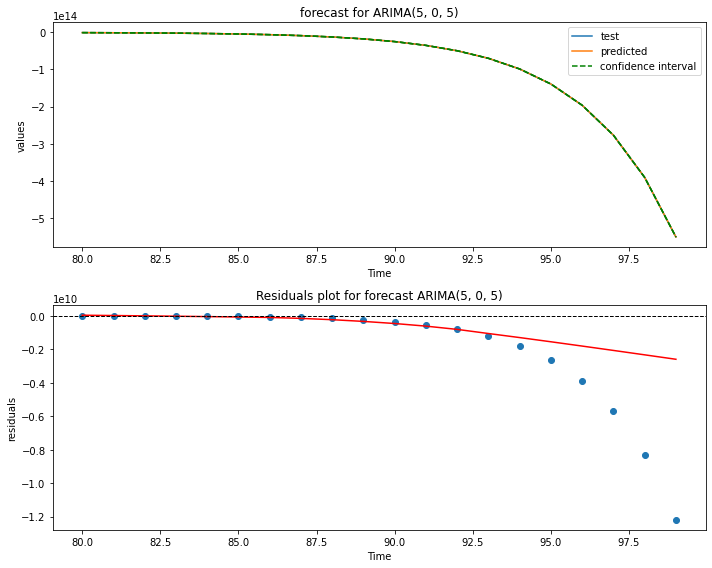

In [15]:
# ARIMA(5, 0, 5)
basic_forecast(p=5, d=0, q=5, ar=[*np.repeat(-1/2, 5)], ma=[*np.repeat(1, 5)],
               n = 100, train_size=.8)

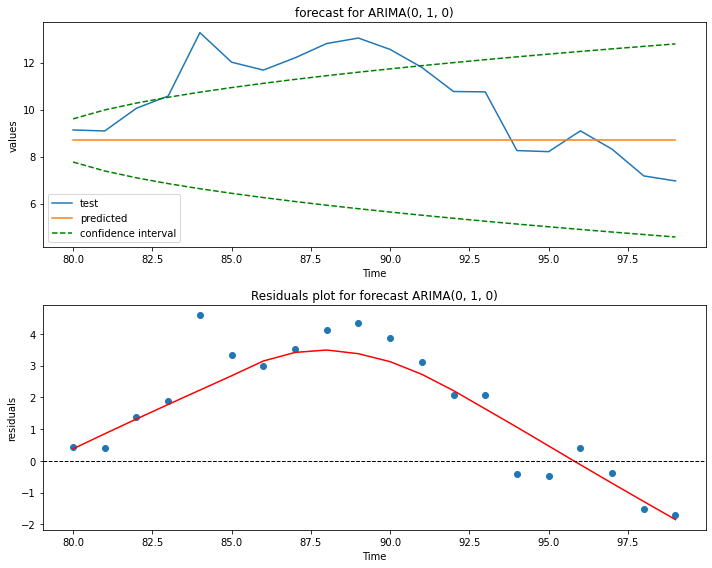

In [16]:
# ARIMA(0, 1, 0)
basic_forecast(p=0, d=1, q=0, ar=[0], ma=[0], n = 100, train_size=.8)

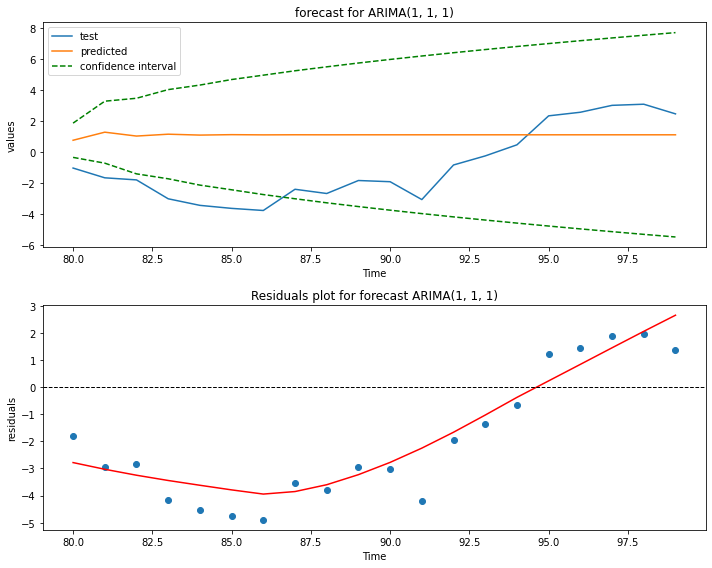

In [17]:
# ARIMA(1, 1, 1)
basic_forecast(p=1, d=1, q=1, ar=[1/2], ma=[1], n = 100, train_size=.8)